In [1]:
import numpy as np
import pandas as pd
import nltk
import re

In [3]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [5]:
stop = stopwords.words('english')

In [10]:
# remove not from stop
stop.remove('not')

**Load Dataset**

In [16]:
dataset = pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t')
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Review    1000 non-null object
Liked     1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [41]:
review

'Wow... Loved this place.'

In [44]:
clean_data = []
for i in range(len(dataset)):
    review = dataset['Review'][i]
    # step - 1: Lower case
    review = review.lower()
    # step - 2: removing special characters , numbers
    review = re.sub('[^a-z]', ' ',review)
    # step - 3: coverting into sentence into list of word -> tokenization
    review = review.split()
    # step - 4: stemming -> replace with root word
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if word not in stop]
    review = ' '.join(review)
    
    clean_data.append(review)

# Word Embedding
- Bag of word model

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
cv = CountVectorizer()

In [48]:
X = cv.fit_transform(clean_data).toarray()

In [50]:
X.shape

(1000, 1566)

In [53]:
print(cv.get_feature_names())

['absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'accordingli', 'account', 'ach', 'acknowledg', 'across', 'actual', 'ad', 'afford', 'afternoon', 'ago', 'ahead', 'airlin', 'airport', 'ala', 'albondiga', 'allergi', 'almond', 'almost', 'alon', 'also', 'although', 'alway', 'amaz', 'ambianc', 'ambienc', 'amount', 'ampl', 'andddd', 'angri', 'annoy', 'anoth', 'anticip', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'apart', 'apolog', 'app', 'appal', 'appar', 'appeal', 'appet', 'appetit', 'appl', 'approv', 'area', 'arepa', 'aria', 'around', 'array', 'arriv', 'articl', 'ask', 'assur', 'ate', 'atmospher', 'atroci', 'attach', 'attack', 'attent', 'attitud', 'auju', 'authent', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom', 'awkward', 'awkwardli', 'ayc', 'az', 'baba', 'babi', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakeri', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'bare', 'bargain', 'bartend', 'base', 'basebal', 'basic', 'batch', 'bathroom', 'batter', 'bay', 'bbq', 

In [54]:
y = dataset.iloc[:,-1].values # dependent variable

**Splitting data**


In [56]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

**Building Machine Learning Model**

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [59]:
model_log = LogisticRegression(C= 10.0)
model_knn = KNeighborsClassifier(n_neighbors=3)
model_svm = SVC(C=10.0 , probability=True)
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier(n_estimators=300)
model_M = MultinomialNB()
model_G = GaussianNB()

*traning*

In [60]:
model_log.fit(x_train,y_train)
model_knn.fit(x_train,y_train)
model_svm.fit(x_train,y_train)
model_dt.fit(x_train,y_train)
model_rf.fit(x_train,y_train)
model_M.fit(x_train,y_train)
model_G.fit(x_train,y_train)

GaussianNB(priors=None)

*Model Evaluation*

In [61]:
y_pred_log = model_log.predict(x_test)
y_pred_knn = model_knn.predict(x_test)
y_pred_svm = model_svm.predict(x_test)
y_pred_dt = model_dt.predict(x_test)
y_pred_rf = model_rf.predict(x_test)
y_pred_M = model_M.predict(x_test)
y_pred_G = model_G.predict(x_test)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
cm_log = confusion_matrix(y_test,y_pred_log)
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_svm = confusion_matrix(y_test,y_pred_svm)
cm_dt = confusion_matrix(y_test,y_pred_dt)
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_M = confusion_matrix(y_test,y_pred_M)
cm_G = confusion_matrix(y_test,y_pred_G)

cr_log = classification_report(y_test,y_pred_log)
cr_knn = classification_report(y_test,y_pred_knn)
cr_svm = classification_report(y_test,y_pred_svm)
cr_dt = classification_report(y_test,y_pred_dt)
cr_rf = classification_report(y_test,y_pred_rf)
cr_M = classification_report(y_test,y_pred_M)
cr_G = classification_report(y_test,y_pred_G)

In [65]:
# import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

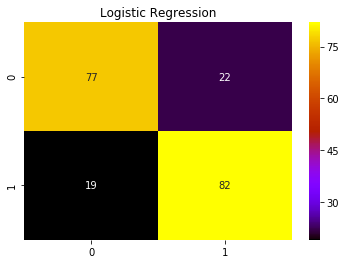

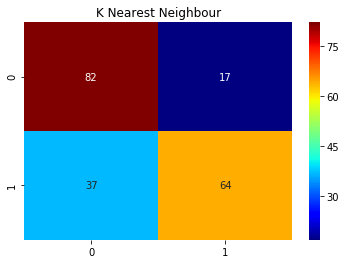

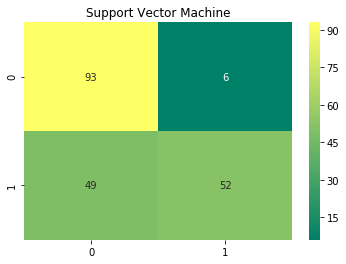

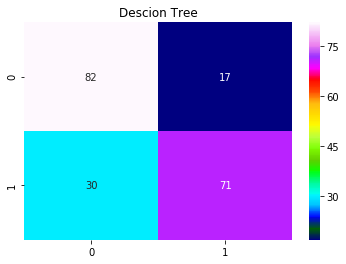

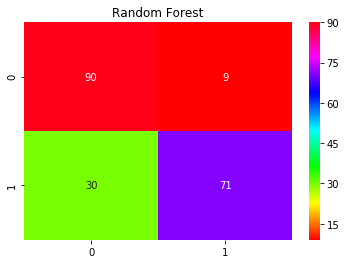

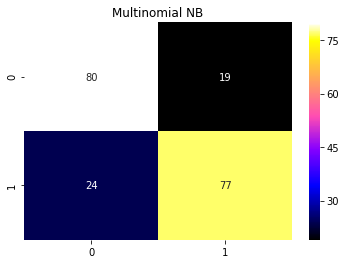

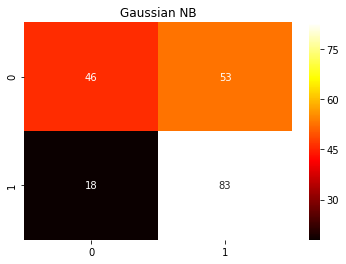





********************Classification Report********************


********************Logistic Regression********************
             precision    recall  f1-score   support

          0       0.80      0.78      0.79        99
          1       0.79      0.81      0.80       101

avg / total       0.80      0.80      0.79       200



********************K Nearest Neighbour********************
             precision    recall  f1-score   support

          0       0.69      0.83      0.75        99
          1       0.79      0.63      0.70       101

avg / total       0.74      0.73      0.73       200



********************Support Vector Machine********************
             precision    recall  f1-score   support

          0       0.65      0.94      0.77        99
          1       0.90      0.51      0.65       101

avg / total       0.78      0.72      0.71       200



********************Descision Tree********************
             precision    recall  f1-score 

In [72]:
sns.heatmap(cm_log,annot=True,cmap = 'gnuplot')
plt.title('Logistic Regression')
plt.show()

sns.heatmap(cm_knn,annot=True,cmap = 'jet')
plt.title('K Nearest Neighbour')
plt.show()

sns.heatmap(cm_svm,annot=True,cmap = 'summer')
plt.title('Support Vector Machine')
plt.show()

sns.heatmap(cm_dt,annot=True,cmap = 'gist_ncar')
plt.title('Descion Tree')
plt.show()

sns.heatmap(cm_rf,annot=True,cmap = 'hsv')
plt.title('Random Forest')
plt.show()

sns.heatmap(cm_M,annot=True,cmap = 'gnuplot2')
plt.title('Multinomial NB')
plt.show()

sns.heatmap(cm_G,annot=True,cmap = 'hot')
plt.title('Gaussian NB')
plt.show()
print('\n\n\n')
print('*'*20+'Classification Report'+'*'*20)
print('\n')
print('*'*20+'Logistic Regression'+'*'*20)
print(cr_log)
print('\n')
print('*'*20+'K Nearest Neighbour'+'*'*20)
print(cr_knn)
print('\n')
print('*'*20+'Support Vector Machine'+'*'*20)
print(cr_svm)
print('\n')
print('*'*20+'Descision Tree'+'*'*20)
print(cr_dt)
print('\n')
print('*'*20+'Random Forest'+'*'*20)
print(cr_rf)
print('\n')
print('*'*20+'Multinomial NB'+'*'*20)
print(cr_M)
print('\n')
print('*'*20+'Gaussian NB'+'*'*20)
print(cr_G)
print('\n')

In [73]:
from sklearn.externals import joblib

In [74]:
joblib.dump(model_rf,'nlp_sentiment.pkl')

['nlp_sentiment.pkl']

In [116]:
text = 'place is good'

In [117]:
ml_model = joblib.load('nlp_sentiment.pkl')

In [118]:
def cleaning_text(text):
    # step - 1: Lower case
    review = text.lower()
    # step - 2: removing special characters , numbers
    review = re.sub('[^a-z]', ' ',review)
    # step - 3: coverting into sentence into list of word -> tokenization
    review = review.split()
    # step - 4: stemming -> replace with root word
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if word not in stop]
    review = ' '.join(review)
    
    return review

In [119]:
clean_d = cleaning_text(text)
clean_d

'place good'

In [120]:
# word embedding
xx = cv.transform([clean_d]).toarray()

In [121]:
xx.shape

(1, 1566)

In [122]:
result = ml_model.predict(xx)

In [123]:
if result == 1:
    print('positive reiviw :)')
else:
    print('Negative reivew :(')

positive reiviw :)


In [124]:
ml_model.predict_proba(xx)

array([[ 0.10666667,  0.89333333]])